# Field Management Zones

In this exercise we will classify field management zones base on soil color and soil texture. Soil color is represented by the `Lab` color system and soil texture was determined by the Hydrometer method. The soil textural class was determined using the USDA-NRCS soil classification triangle.

The dataset contains four different soil textural classes.

In [1]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans


In [2]:
# Load data
data = pd.read_csv('../datasets/field_spatial_variability.csv')
data.head()


,latitude,longitude,X,Y,sand,clay,L,a,b,textural_class
0,38.71337,-97.43272,636266.5785,4285928.184,29.5,25.2,40.4,5.1,10.6,Loam
1,38.71386,-97.43394,636159.5704,4285980.746,44.4,17.5,46.0,7.9,15.6,Loam
2,38.71342,-97.43600,635981.2897,4285928.857,47.5,12.5,46.3,7.7,15.3,Loam
3,38.71383,-97.43282,636257.0101,4285979.083,47.1,15.1,42.7,7.0,13.3,Loam
4,38.71338,-97.43371,636180.4796,4285927.821,41.3,17.5,46.8,7.2,14.6,Loam


In [3]:
# Bottom rows
data.tail()


,latitude,longitude,X,Y,sand,clay,L,a,b,textural_class
108,38.71640,-97.43465,636093.0191,4286261.561,45.1,19.0,46.6,7.2,14.8,Loam
109,38.71651,-97.43664,635919.7888,4286270.812,26.2,26.8,42.5,5.8,11.5,Loam
110,38.71685,-97.43610,635966.0951,4286309.345,23.0,28.1,42.9,5.7,11.5,Clay loam
111,38.71725,-97.43575,635995.7677,4286354.253,29.4,23.0,44.4,5.9,11.9,Loam
112,38.71766,-97.43558,636009.7710,4286400.005,31.9,23.0,45.0,6.2,12.8,Loam


In [4]:
# Select variables
X = data[['L','a','b']]
X.head()


,L,a,b
0,40.4,5.1,10.6
1,46.0,7.9,15.6
2,46.3,7.7,15.3
3,42.7,7.0,13.3
4,46.8,7.2,14.6


In [5]:
# Clustering
k_zones = 3 # An arbitrary but reasonable number of field management zones.
y_pred = KMeans(n_clusters=k_zones, random_state=0).fit_predict(X)
print(y_pred)


[1 0 0 2 0 0 0 1 2 2 0 2 2 2 1 1 1 1 0 0 0 2 2 2 0 0 1 0 2 0 2 1 2 0 2 1 0
 0 0 2 2 2 2 2 0 2 2 0 2 2 1 0 2 0 0 0 0 2 0 2 0 0 0 0 0 2 0 2 0 2 0 0 2 0
 0 0 2 2 2 2 2 2 0 0 0 2 0 1 2 2 0 2 0 2 2 2 0 0 2 0 2 0 0 2 2 0 0 0 0 2 2
 2 2]


In [6]:
# Append classification to original dataframe
data['clusters'] = y_pred
data


,latitude,longitude,X,Y,sand,clay,L,a,b,textural_class,clusters
0,38.71337,-97.43272,636266.5785,4285928.184,29.5,25.2,40.4,5.1,10.6,Loam,1
1,38.71386,-97.43394,636159.5704,4285980.746,44.4,17.5,46.0,7.9,15.6,Loam,0
2,38.71342,-97.43600,635981.2897,4285928.857,47.5,12.5,46.3,7.7,15.3,Loam,0
3,38.71383,-97.43282,636257.0101,4285979.083,47.1,15.1,42.7,7.0,13.3,Loam,2
4,38.71338,-97.43371,636180.4796,4285927.821,41.3,17.5,46.8,7.2,14.6,Loam,0
...,...,...,...,...,...,...,...,...,...,...,...
108,38.71640,-97.43465,636093.0191,4286261.561,45.1,19.0,46.6,7.2,14.8,Loam,0
109,38.71651,-97.43664,635919.7888,4286270.812,26.2,26.8,42.5,5.8,11.5,Loam,2
110,38.71685,-97.43610,635966.0951,4286309.345,23.0,28.1,42.9,5.7,11.5,Clay loam,2
111,38.71725,-97.43575,635995.7677,4286354.253,29.4,23.0,44.4,5.9,11.9,Loam,2


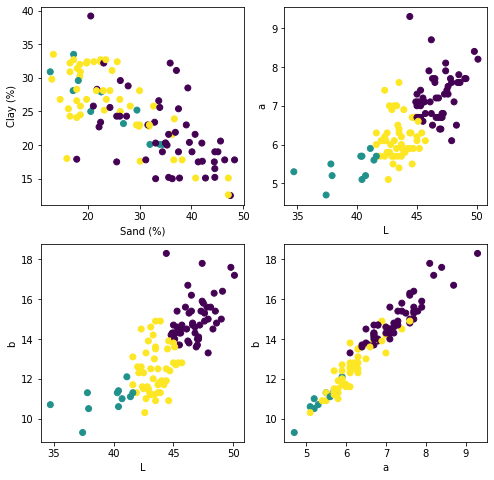

In [7]:
# Show correlations between variables. Let's add some soil texture
# to see how sand and clay are related to the clusters.
plt.figure(figsize=(8, 8))
plt.subplot(221)
plt.scatter(data['sand'], data['clay'], c=y_pred)
plt.xlabel('Sand (%)')
plt.ylabel('Clay (%)')

plt.subplot(222)
plt.scatter(data['L'], data['a'], c=y_pred)
plt.xlabel('L')
plt.ylabel('a')

plt.subplot(223)
plt.scatter(data['L'], data['b'], c=y_pred)
plt.xlabel('L')
plt.ylabel('b')

plt.subplot(224)
plt.scatter(data['a'], data['b'], c=y_pred)
plt.xlabel('a')
plt.ylabel('b')

plt.show()

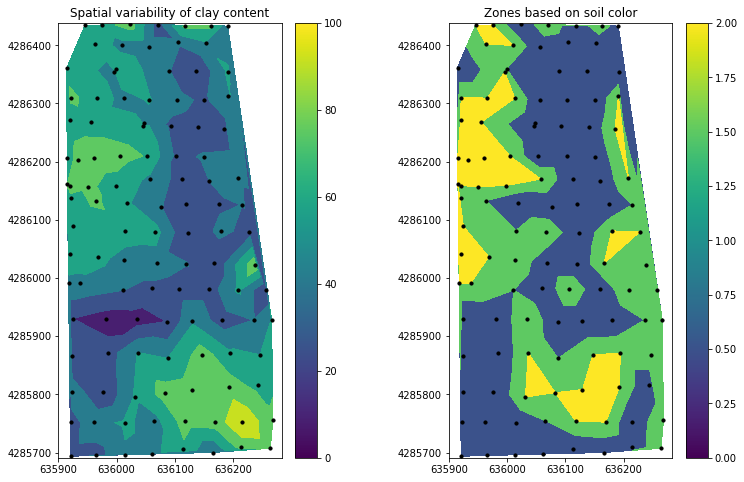

In [11]:
# Plot field managment zones
plt.figure(figsize=(12,8))
plt.subplot(121)
plt.title('Spatial variability of clay content')
plt.tricontourf(data['X'], data['Y'], data['clay'], levels=5)
plt.scatter(data['X'], data['Y'], s=10, marker='o', facecolors='k')
plt.axis('equal')
plt.clim(0, 100)
plt.colorbar()

plt.subplot(122)
plt.title('Zones based on soil color')
plt.tricontourf(data['X'], data['Y'], data['clusters'], 
                cmap="viridis", 
                levels=[0,1,2], 
                extend='both')
plt.scatter(data['X'], data['Y'], s=10, marker='o', facecolors='k')
plt.axis('equal')
plt.clim(0, 2)
plt.colorbar()

plt.subplots_adjust(wspace=0.4)
#plt.colorbar()
plt.show()

# Matplotlib cmaps: https://matplotlib.org/tutorials/colors/colormaps.html

## Observations

- Does the soil color classification match the spatial patterns of soil textural class?

- How can we compare the similarity between the resulting classified map and another map of a given soil physical property?

- What is the right number of clusters in which we need to divide a dataset?

## References

Arthur, D. and Vassilvitskii, S., 2007, January. k-means++: The advantages of careful seeding. In Proceedings of the eighteenth annual ACM-SIAM symposium on Discrete algorithms (pp. 1027-1035). Society for Industrial and Applied Mathematics.

Hartigan, J.A. and Wong, M.A., 1979. Algorithm AS 136: A k-means clustering algorithm. Journal of the Royal Statistical Society. Series C (Applied Statistics), 28(1), pp.100-108.

Konen, M.E., Burras, C.L. and Sandor, J.A., 2003. Organic carbon, texture, and quantitative color measurement relationships for cultivated soils in north central Iowa. Soil Science Society of America Journal, 67(6), pp.1823-1830.
